In [1]:
import numpy as np
from matplotlib import pyplot as plt
from perceptron import perceptron
import pickle

In [2]:
np.random.seed(6)

In [3]:
def train_test_split(data, training_ratio=0.7):
    train_sample_size = np.int_(data.shape[0]*training_ratio)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:, :]


# Linearly seperable data for classification

### Importing data

In [4]:
file_class1 = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/LS_Group10/Class1.txt'
file_class2 = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/LS_Group10/Class2.txt'
file_class3 = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Classification/LS_Group10/Class3.txt'

In [5]:
class1_data = np.loadtxt(file_class1, delimiter=' ', dtype=float)
class2_data = np.loadtxt(file_class2, delimiter=' ', dtype=float)
class3_data = np.loadtxt(file_class3, delimiter=' ', dtype=float)

In [6]:
class1_data.shape, class2_data.shape, class3_data.shape

((500, 2), (500, 2), (500, 2))

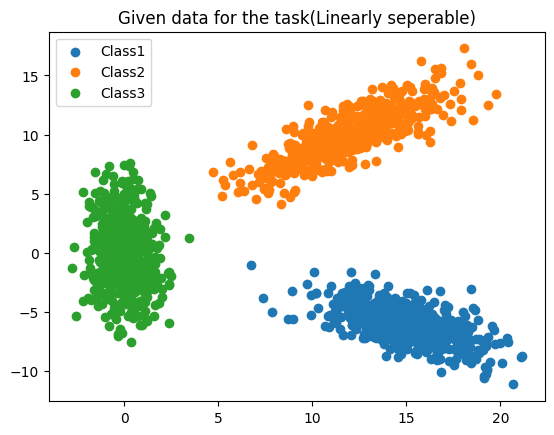

In [7]:
plt.figure()
plt.scatter(class1_data[:, 0], class1_data[:, 1])
plt.scatter(class2_data[:, 0], class2_data[:, 1])
plt.scatter(class3_data[:, 0], class3_data[:, 1])
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Given data for the task(Linearly seperable)')
plt.show()

### Spliting data

In [8]:
class1_train, class1_test = train_test_split(class1_data)
class2_train, class2_test = train_test_split(class2_data)
class3_train, class3_test = train_test_split(class3_data)

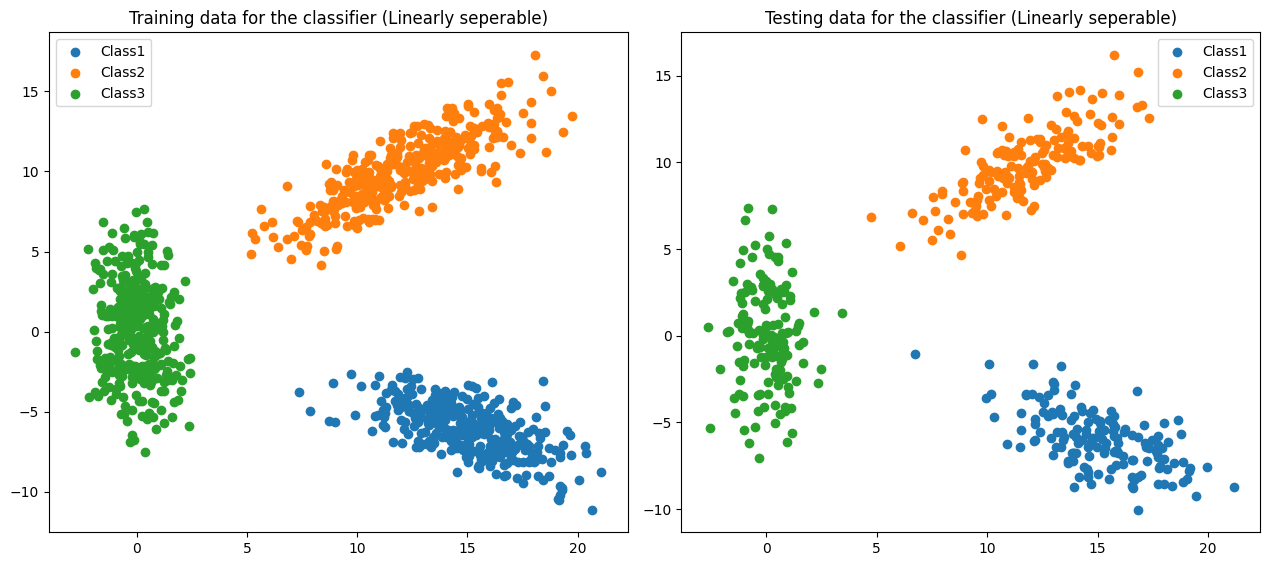

In [9]:
plt.figure()
plt.subplot(1,2,1)
plt.scatter(class1_train[:, 0], class1_train[:, 1])
plt.scatter(class2_train[:, 0], class2_train[:, 1])
plt.scatter(class3_train[:, 0], class3_train[:, 1])
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Training data for the classifier (Linearly seperable)')

plt.subplot(1,2,2)
plt.scatter(class1_test[:, 0], class1_test[:, 1])
plt.scatter(class2_test[:, 0], class2_test[:, 1])
plt.scatter(class3_test[:, 0], class3_test[:, 1])
plt.legend(['Class1', 'Class2', 'Class3'])
plt.title('Testing data for the classifier (Linearly seperable)')
plt.tight_layout(rect=[0, 0, 2, 1.2])
plt.show()

### Building classifier

In [10]:
class classifer:
    def __init__(self, class1_train, class2_train, class3_train):
        self.class1v2 = perceptron(labels=(1, 2), n_features=2, activation='threshold')
        self.class2v3 = perceptron(labels=(2, 3), n_features=2, activation='threshold')
        self.class3v1 = perceptron(labels=(3, 1), n_features=2, activation='threshold')
        self.epoch_err_1 = self.class1v2.fit(class1_train, class2_train)
        self.epoch_err_2 = self.class2v3.fit(class2_train, class3_train)
        self.epoch_err_3 = self.class3v1.fit(class3_train, class1_train)
        return None
    
    def predict(self, sample):
        preds = self.class1v2.predict(sample), self.class2v3.predict(sample), self.class3v1.predict(sample)
        return max(preds, key=preds.count)
    
    def predict1v2(self, sample):
        return self.class1v2.predict(sample)
    
    def predict2v3(self, sample):
        return self.class2v3.predict(sample)
    
    def predict3v1(self, sample):
        return self.class3v1.predict(sample)



In [11]:
l_classifier = classifer(class1_train, class2_train, class3_train)
# import pickle
# with open("l_classifier.pkl", mode="wb") as f:
#     pickle.dump(l_classifier, f, pickle.HIGHEST_PROTOCOL)

# with open("l_classifier.pkl", mode='rb') as f:
#     l_classifier = pickle.load(f)

In [12]:
len(l_classifier.epoch_err_1), len(l_classifier.epoch_err_2), len(l_classifier.epoch_err_3)

(2, 3, 2)

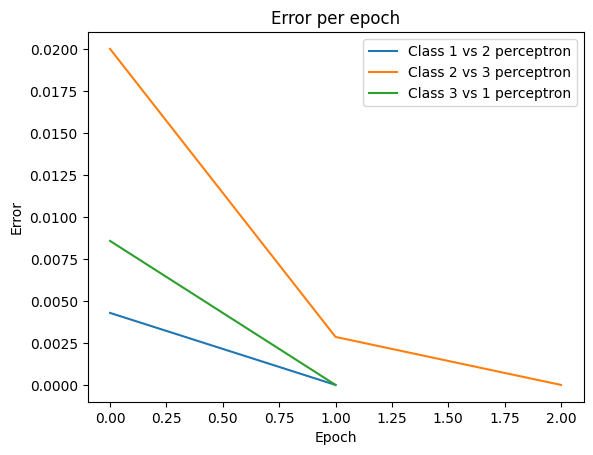

In [13]:
plt.figure()
plt.plot(l_classifier.epoch_err_1, label="Class 1 vs 2 perceptron")
plt.plot(l_classifier.epoch_err_2, label="Class 2 vs 3 perceptron")
plt.plot(l_classifier.epoch_err_3, label="Class 3 vs 1 perceptron")
plt.title("Error per epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

In [14]:
# generating points in the region
x_arr = np.linspace(-6, 22, 1000)
y_arr = np.linspace(-12, 19, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)


In [15]:
pred_region1v2 = []
for point in region:
    pred_region1v2.append(l_classifier.predict1v2(point))
pred_region1v2 = np.reshape(pred_region1v2, xx.shape)

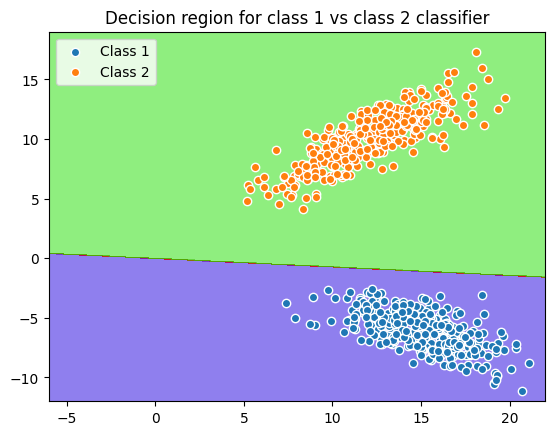

In [16]:
plt.figure()
plt.contourf(xx, yy, pred_region1v2, alpha = 0.5, cmap='brg')

plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.legend()
plt.title('Decision region for class 1 vs class 2 classifier')

plt.show()

In [17]:
pred_region2v3 = []
for point in region:
    pred_region2v3.append(l_classifier.predict2v3(point))
pred_region2v3 = np.reshape(pred_region2v3, xx.shape)

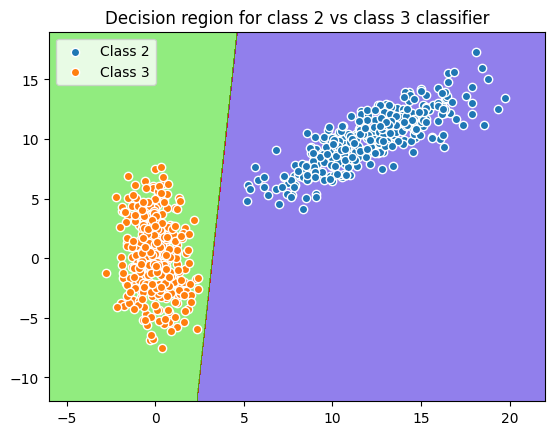

In [18]:
plt.figure()
plt.contourf(xx, yy, pred_region2v3, alpha = 0.5, cmap='brg')

plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.legend()
plt.title('Decision region for class 2 vs class 3 classifier')

plt.show()

In [19]:
pred_region3v1 = []
for point in region:
    pred_region3v1.append(l_classifier.predict3v1(point))
pred_region3v1 = np.reshape(pred_region3v1, xx.shape)

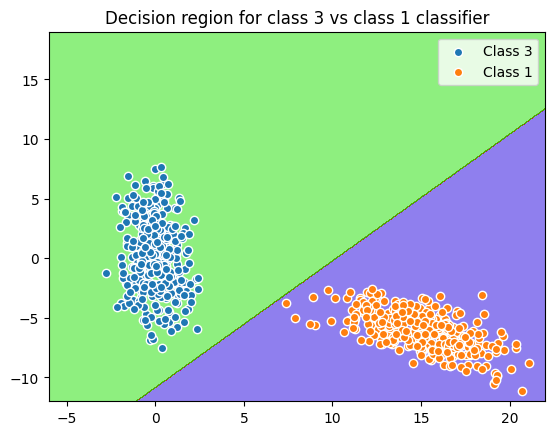

In [20]:
plt.figure()
plt.contourf(xx, yy, pred_region3v1, alpha = 0.5, cmap='brg')

plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.legend()
plt.title('Decision region for class 3 vs class 1 classifier')

plt.show()

In [21]:
pred_region = []
for point in region:
    pred_region.append(l_classifier.predict(point))

In [22]:
region.shape, len(pred_region)

((1000000, 2), 1000000)

In [23]:
pred_region = np.reshape(pred_region, xx.shape)

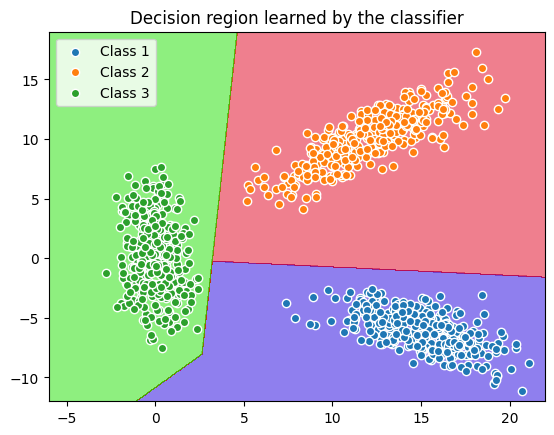

In [24]:
plt.figure()
plt.contourf(xx, yy, pred_region, alpha = 0.5, cmap='brg')

plt.scatter(class1_train[:, 0], class1_train[:, 1], label='Class 1', edgecolors='white')
plt.scatter(class2_train[:, 0], class2_train[:, 1], label='Class 2', edgecolors='white')
plt.scatter(class3_train[:, 0], class3_train[:, 1], label='Class 3', edgecolors='white')
plt.legend()
plt.title('Decision region learned by the classifier')

plt.show()